In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### **Creating dataframe**

In [2]:
df = pd.read_csv('cardekho_dataset.csv')

In [3]:
df.shape

(15411, 14)

**observation** There are 15411 rows and 14 columns

In [4]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### **Data Processing**

**removing irrelavant columns** <br>
'Unnamed: 0' and 'car_name' are irrelevant columns

In [5]:
df.drop(['Unnamed: 0', 'car_name'], axis = 1, inplace = True)

In [6]:
df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


**Handling Null values**

In [7]:
df.isna().sum()

brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

**observation** There are no null values

**Handling duplicate values**

In [8]:
df.duplicated().sum()

167

In [9]:
df[df.duplicated()]

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
197,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
360,Maruti,Baleno,2,5000,Individual,Petrol,Automatic,21.40,1197,83.10,5,686000
1353,Maruti,Swift Dzire,4,50000,Individual,Diesel,Manual,28.40,1248,74.02,5,680000
1429,Maruti,Wagon R,13,100000,Individual,Petrol,Manual,18.90,1061,67.00,5,150000
1485,Hyundai,i20,3,50000,Individual,Petrol,Manual,18.60,1197,81.83,5,625000
...,...,...,...,...,...,...,...,...,...,...,...,...
15229,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
15324,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
15367,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
15378,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [10]:
print(f'% of duplicated values : {round(100 * 167 / 15411, 2)}%')

% of duplicated values : 1.08%


Dropping the duplicate values

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(15244, 12)

Number of rows before : 15411 and after : 15244

### **EDA**

In [13]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

**observation** There are some irregularities in brand column

In [14]:
correct_brand_names = {
    'Mercedes-Benz' : 'Mercedes',
    'Mercedes-AMG' : 'Mercedes',
    'ISUZU' : 'Isuzu'
}

In [15]:
correct_brand_names.keys()

dict_keys(['Mercedes-Benz', 'Mercedes-AMG', 'ISUZU'])

In [16]:
df['brand'].replace(correct_brand_names, inplace = True)

In [17]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'Ferrari', 'Rolls-Royce', 'Force'],
      dtype=object)

In [18]:
df['brand'].value_counts()

Maruti         4933
Hyundai        2952
Honda          1476
Mahindra        999
Toyota          789
Ford            776
Volkswagen      614
Renault         527
BMW             436
Tata            421
Skoda           333
Mercedes        333
Audi            190
Datsun          170
Jaguar           58
Land Rover       50
Jeep             41
Kia              32
Porsche          21
Volvo            20
MG               19
Mini             17
Nissan           11
Isuzu             9
Lexus             9
Bentley           3
Maserati          2
Ferrari           1
Rolls-Royce       1
Force             1
Name: brand, dtype: int64

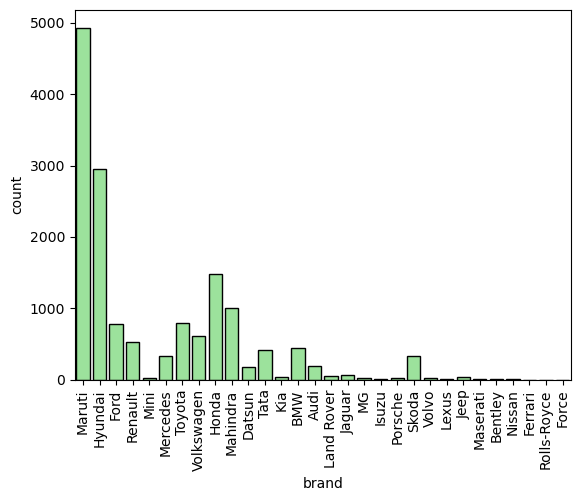

In [19]:
sns.countplot(data = df, x = 'brand', color = 'lightgreen', edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

**observation** Clearly Maruti, Hyundai and Honda have most cars sold on CarDekho

**cars vs models**

**question??** find out number of unique models per brand

In [20]:
df[df['brand'] == 'Maruti']['model'].nunique()

16

In [21]:
brand_number_of_models = df.groupby(['brand'])['model'].nunique().reset_index()
brand_number_of_models.columns = ['brand', 'number of models']

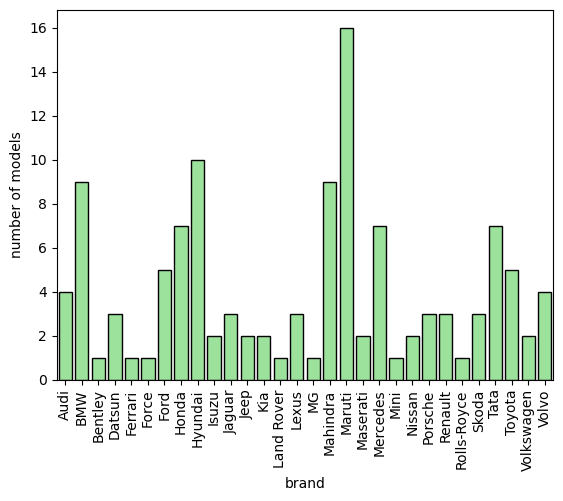

In [22]:
sns.barplot(data = brand_number_of_models, x = 'brand', y = 'number of models', color = 'lightgreen', edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

**obervation** There are many models of brand Maruti than any other brand

**selling price**<br>
Studying distribution of spelling price from the dataset

In [23]:
df['selling_price'].describe()

count    1.524400e+04
mean     7.747014e+05
std      8.946761e+05
min      4.000000e+04
25%      3.850000e+05
50%      5.590000e+05
75%      8.250000e+05
max      3.950000e+07
Name: selling_price, dtype: float64

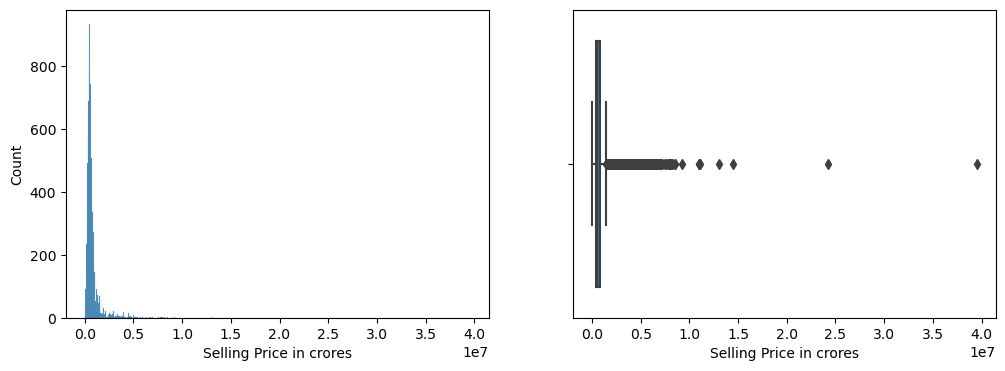

In [24]:
plt.figure(figsize = (12 ,4))

plt.subplot(1,2,1)
sns.histplot(data = df, x = 'selling_price')
plt.xlabel('Selling Price in crores')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'selling_price')
plt.xlabel('Selling Price in crores')

plt.show()

In [25]:
df['selling_price'].quantile(0.70)

750000.0

In [26]:
print(f'Mean of selling price : {round(df["selling_price"].mean(),2)}')
print(f'Median of selling price : {round(df["selling_price"].median(),2)}')

Mean of selling price : 774701.45
Median of selling price : 559000.0


**observation** <br>
1. There is large differnce in mean and median of selling prices
2. Selling price is highly biased, as 70% vehicles have selling price below 7,50,000
3. However max selling price is 3,95,000

**Performing outlier analysis on selling_price data**

In [27]:
def lower_and_upper_limit(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return (q1 - 1.5 * iqr), (q3 + 1.5 * iqr)
def removing_outliers(data, column):
    lower_limit, upper_limit = lower_and_upper_limit(data, column)
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

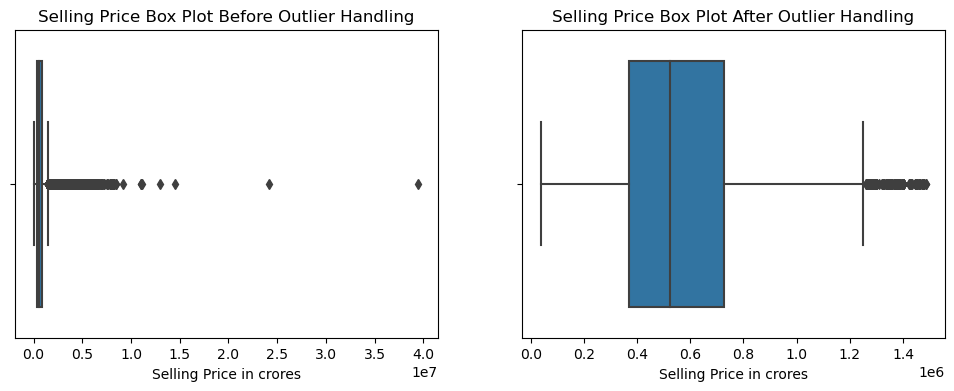

In [28]:
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'selling_price')
plt.title('Selling Price Box Plot Before Outlier Handling')
plt.xlabel('Selling Price in crores') 

df = removing_outliers(df, 'selling_price')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'selling_price')
plt.title('Selling Price Box Plot After Outlier Handling')
plt.xlabel('Selling Price in crores') 

plt.show()

Plotting histogram of selling price to see new distribution of selling price

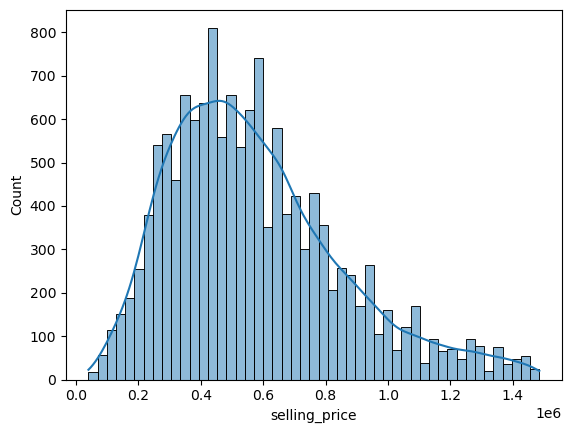

In [29]:
sns.histplot(data = df, x = 'selling_price', kde = True)
plt.show()

**observation** Outlier now seems to be reduced significantly

**brand vs price**

In [30]:
brand_vs_mean_selling_price = df.groupby('brand')['selling_price'].mean().reset_index()
brand_vs_mean_selling_price.columns = ['brand', 'mean price']

In [31]:
brand_vs_mean_selling_price

,brand,mean price
0,Audi,1.221676e+06
1,BMW,1.026896e+06
2,Datsun,3.205176e+05
3,Force,7.000000e+05
4,Ford,5.504161e+05
5,Honda,5.977380e+05
6,Hyundai,5.668377e+05
7,Isuzu,1.223333e+06
8,Jaguar,1.349333e+06
9,Jeep,1.355200e+06


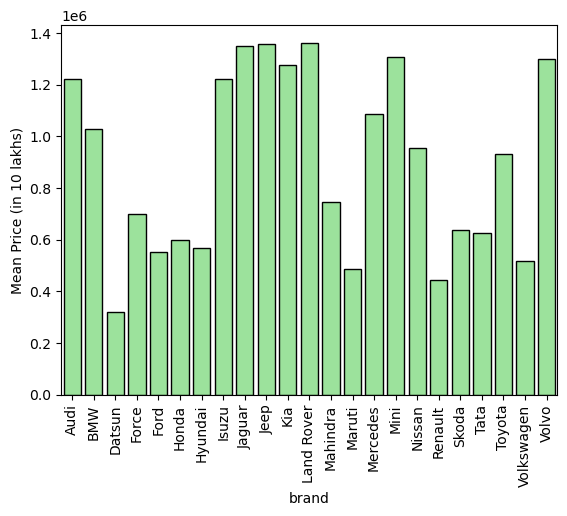

In [32]:
sns.barplot(data = brand_vs_mean_selling_price, x = 'brand', y = 'mean price', color = 'lightgreen', edgecolor = 'black')
plt.xticks(rotation = 90)
plt.ylabel('Mean Price (in 10 lakhs)')
plt.show()

Top 10 car brands havig highest selling price

In [33]:
brand_vs_mean_selling_price.sort_values('mean price', ascending = False)['brand'].head(10)

11    Land Rover
9           Jeep
8         Jaguar
15          Mini
22         Volvo
10           Kia
7          Isuzu
0           Audi
14      Mercedes
1            BMW
Name: brand, dtype: object

**vehicle age**

In [34]:
df['vehicle_age'].unique()

array([ 9,  5, 11,  6,  8,  3,  2,  4,  7, 10, 14, 12,  1, 15, 13, 16, 17,
       18, 29, 19,  0, 21, 22, 25], dtype=int64)

Lets examine the distirbution of vehicle age

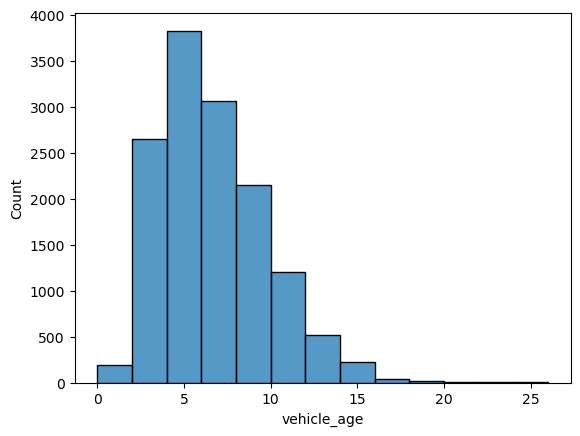

In [35]:
sns.histplot(data = df, x = 'vehicle_age', bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])
plt.show()

In [36]:
print(f'Mean of vehicle age : {round(df["vehicle_age"].mean(), 2)}')
print(f'Median of vehicle age : {round(df["vehicle_age"].median(), 2)}')

Mean of vehicle age : 6.16
Median of vehicle age : 6.0


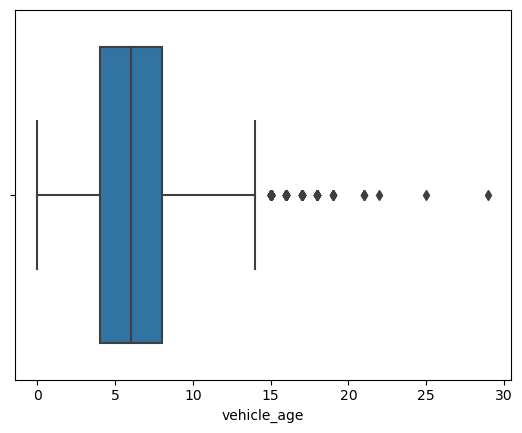

In [37]:
sns.boxplot(data = df, x = 'vehicle_age')
plt.show()

**observation** There are clear outliers<br>
Handling outliers in vehicle age

In [38]:
df = removing_outliers(df, 'vehicle_age')

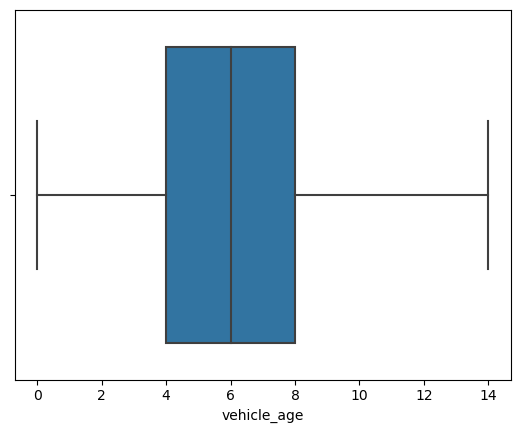

In [39]:
sns.boxplot(data = df, x = 'vehicle_age')
plt.show()

**vehicle_age vs price**

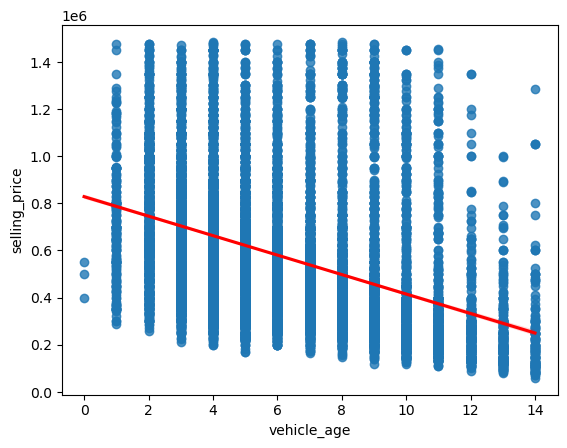

In [40]:
sns.regplot(data = df, x = 'vehicle_age', y = 'selling_price', line_kws={"color": "red"})
plt.show()

In [41]:
df['vehicle_age'].corr(df['selling_price'])

-0.4302729934296934

**observation** 
1. Observing the regression line we can clearly see that as age of the vehicle increases the selling price goes down
2. There is negative correlation betweeen vehicle_age and selling_price
3. corr(vehicle_age, selling_price) = -0.44

**km_driven**

Lets study distribution of km_driven

In [42]:
df['km_driven'].describe()

count    1.371900e+04
mean     5.608212e+04
std      5.311120e+04
min      1.000000e+02
25%      3.000000e+04
50%      5.000000e+04
75%      7.098100e+04
max      3.800000e+06
Name: km_driven, dtype: float64

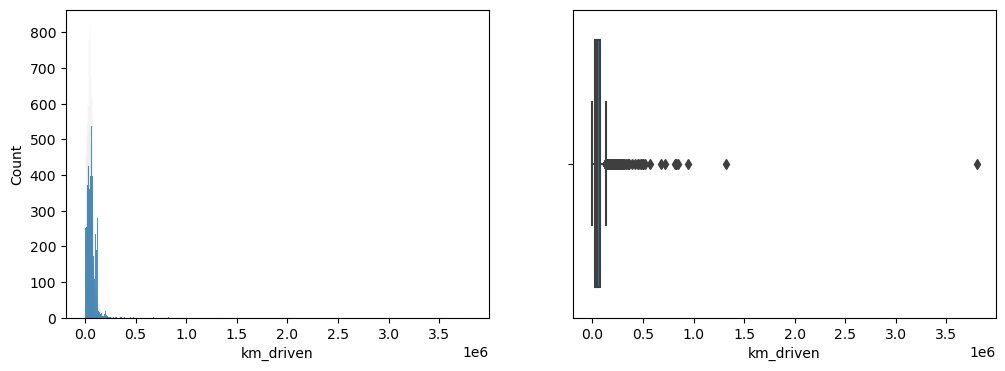

In [43]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.histplot(data = df, x = 'km_driven')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'km_driven')

plt.show()

**observation** Again there are many outliers in this data

In [44]:
df = removing_outliers(df, 'km_driven')

After handling outliers in the data

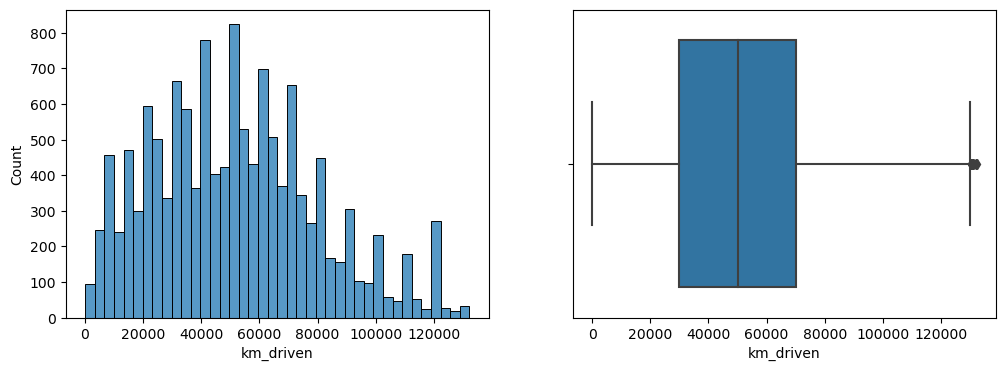

In [45]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.histplot(data = df, x = 'km_driven')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'km_driven')

plt.show()

**km_drive vs selling_prce**

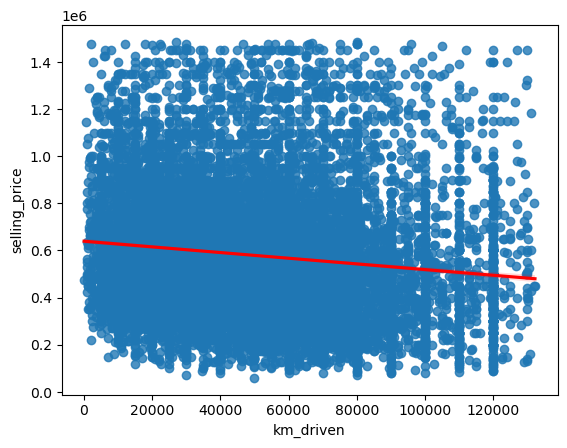

In [46]:
sns.regplot(data = df, x = 'km_driven', y = 'selling_price', line_kws={"color": "red"})
plt.show()

In [47]:
df['km_driven'].corr(df['selling_price'])

-0.12385688445954324

**observation** 
1. Observing the regression line we can clearly see that as age of the vehicle increases the selling price goes down
2. There is negative correlation betweeen vehicle_age and selling_price
3. corr(vehicle_age, selling_price) = -0.12

**mileage**

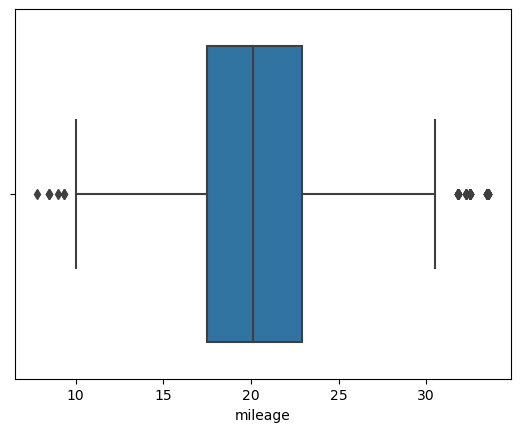

In [48]:
sns.boxplot(data = df, x = 'mileage')
plt.show()

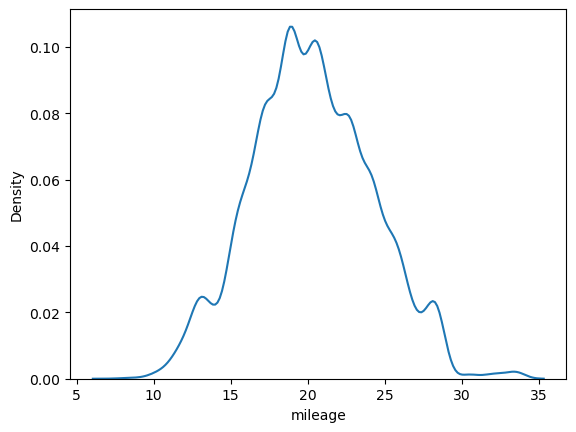

In [49]:
sns.kdeplot(df['mileage'])
plt.show()

**observation** mileage seems to follow normal distribution loosely

**mileage vs selling price**

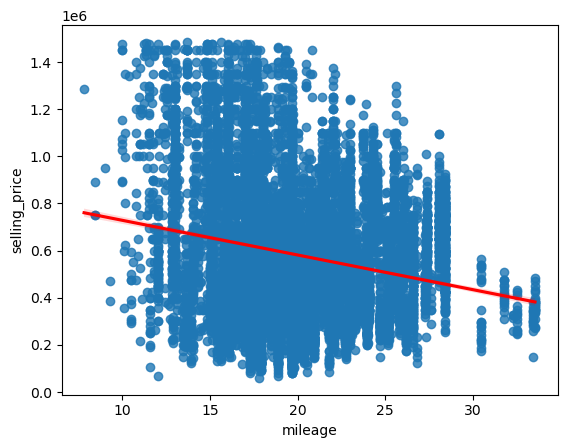

In [50]:
sns.regplot(data = df, x = 'mileage', y = 'selling_price', line_kws={"color": "red"})
plt.show()

**engine**

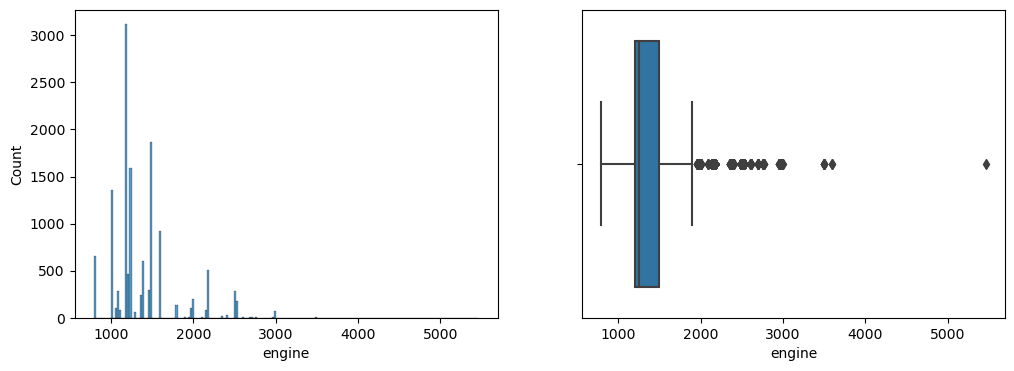

In [51]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.histplot(data = df, x = 'engine')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'engine')

plt.show()

In [52]:
df = removing_outliers(df, 'engine')

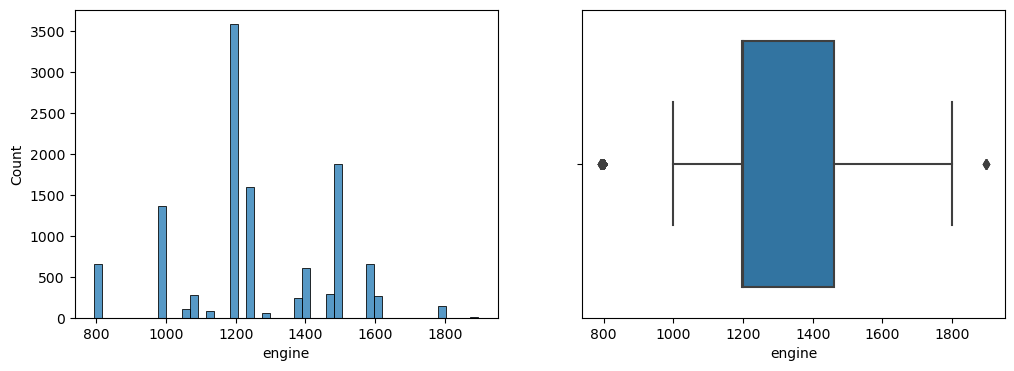

In [53]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.histplot(data = df, x = 'engine')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'engine')

plt.show()

**engine vs price**

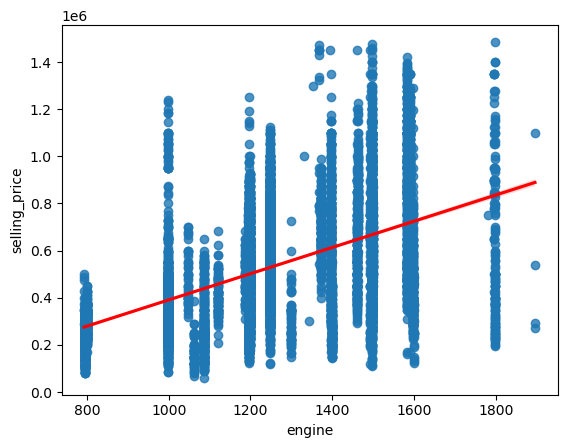

In [54]:
sns.regplot(data = df, x = 'engine', y = 'selling_price', line_kws = {'color' : 'red'})
plt.show()

In [55]:
df['engine'].corr(df['selling_price'])

0.49947564337976974

**observation** 
1. Observing the regression line we can clearly see that selling_price increases as engine power increases
2. There is positive correlation betweeen vehicle_age and selling_price
3. corr(engine, selling_price) = 0.45

**max_power**<br>
Lets study distribution of max_power

In [56]:
df['max_power'].describe()

count    11788.000000
mean        85.825110
std         20.411897
min         38.400000
25%         73.900000
50%         82.000000
75%         98.600000
max        189.000000
Name: max_power, dtype: float64

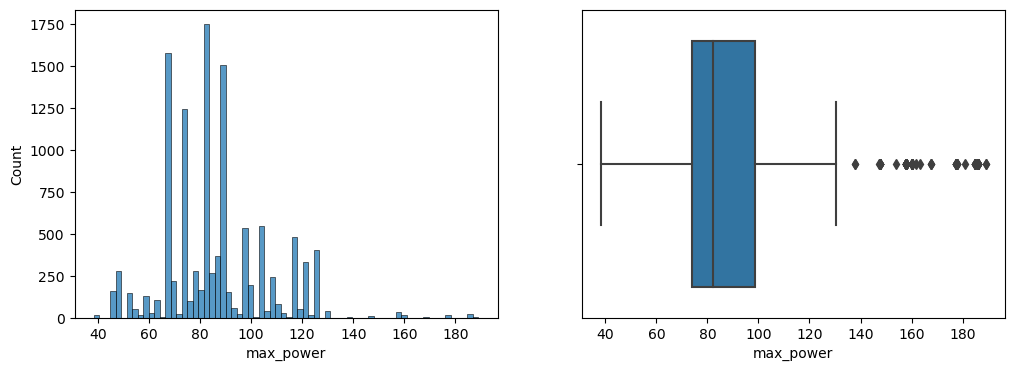

In [57]:
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
sns.histplot(data = df, x = 'max_power')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'max_power')

plt.show()

In [58]:
lower_limit, upper_limit = lower_and_upper_limit(df, 'max_power')
print(lower_limit)
print(upper_limit)

36.85000000000002
135.64999999999998


In [59]:
df[df['max_power'] > upper_limit]['max_power'].count()

111

There are 111 observations where max_power in a outlier

In [60]:
df = removing_outliers(df, 'max_power')

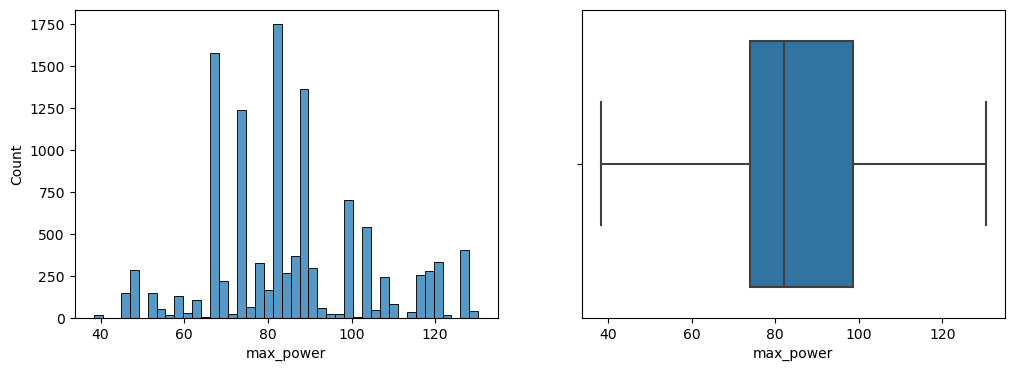

In [61]:
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
sns.histplot(data = df, x = 'max_power')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'max_power')

plt.show()

**max_power vs selling price**

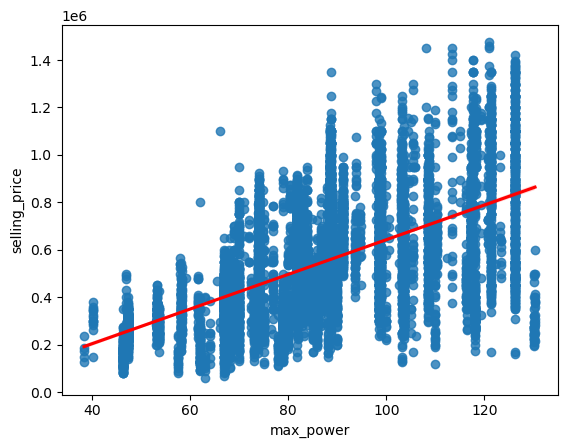

In [62]:
sns.regplot(data = df, x = 'max_power', y = 'selling_price', line_kws = {'color' : 'red'})
plt.show()

In [63]:
df['max_power'].corr(df['selling_price'])

0.589534214130964

**observation** 
1. Observing the regression line we can clearly see that selling_price increases as max_power increases
2. There is positive correlation betweeen max_power and selling_price
3. corr(max_power, selling_price) = 0.59

**seller_type**

In [64]:
df['seller_type'].value_counts()

Dealer              7058
Individual          4448
Trustmark Dealer     171
Name: seller_type, dtype: int64

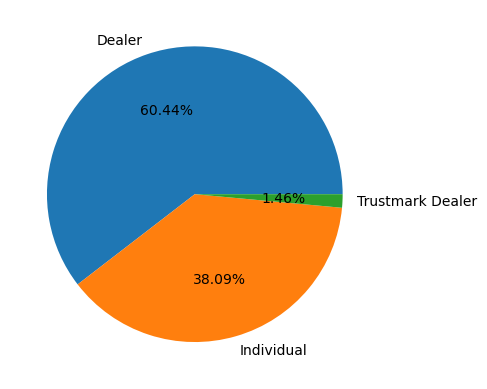

In [65]:
plt.pie(df['seller_type'].value_counts().values, labels = df['seller_type'].value_counts().index, autopct = '%.2f%%')
plt.show()

**seller_type vs selling price**

In [66]:
seller_type_vs_selling_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

In [67]:
seller_type_vs_selling_price.columns = ['seller_type', 'avg_selling_price']
seller_type_vs_selling_price

,seller_type,avg_selling_price
0,Dealer,543825.446302
1,Individual,515512.365108
2,Trustmark Dealer,562187.134503


**observation** 
1. Trustmark Dealer has greatest avg_selling_price

**fuel_type**

In [68]:
df['fuel_type'].value_counts()

Petrol    6971
Diesel    4371
CNG        293
LPG         42
Name: fuel_type, dtype: int64

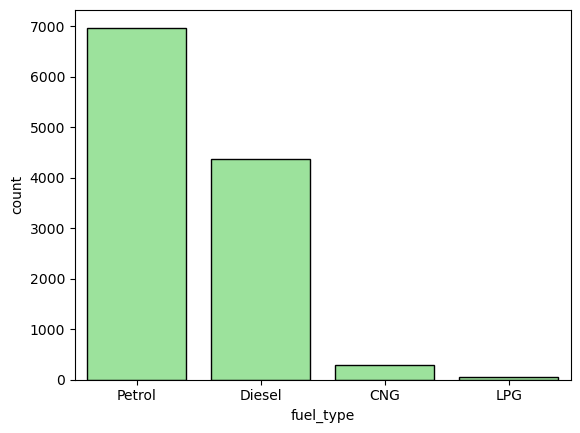

In [69]:
sns.countplot(data = df, x = 'fuel_type', color = 'lightgreen', edgecolor = 'black')
plt.show()

**fuel_type vs selling_price**

In [70]:
fuel_type_vs_selling_price = df.groupby('fuel_type')['selling_price'].mean().reset_index()
fuel_type_vs_selling_price.columns = ['fuel_type', 'avg_selling_price']

In [71]:
fuel_type_vs_selling_price

,fuel_type,avg_selling_price
0,CNG,416668.941980
1,Diesel,618822.466255
2,LPG,207761.904762
3,Petrol,486554.296371


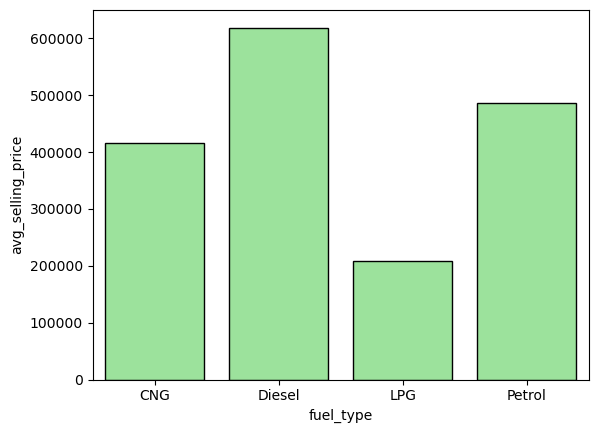

In [72]:
sns.barplot(data = fuel_type_vs_selling_price, x = 'fuel_type', y = 'avg_selling_price', 
            color = 'lightgreen', edgecolor = 'black')
plt.show()

**transmission_type**

In [73]:
df['transmission_type'].value_counts()

Manual       10196
Automatic     1481
Name: transmission_type, dtype: int64

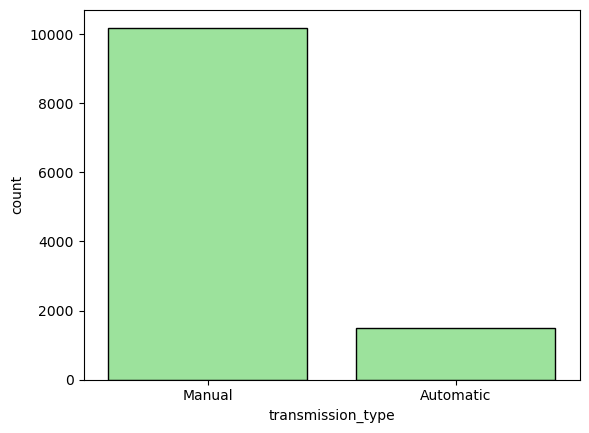

In [74]:
sns.countplot(data = df, x = 'transmission_type', color = 'lightgreen', edgecolor = 'black')
plt.show()

**transmission_type vs selling_price**

In [75]:
transmission_type_vs_selling_price = df.groupby('transmission_type')['selling_price'].mean().reset_index()
transmission_type_vs_selling_price.columns = ['transmission_type', 'avg_selling_price']

In [76]:
transmission_type_vs_selling_price

,transmission_type,avg_selling_price
0,Automatic,682166.103984
1,Manual,511687.426442


**observation** Automatic transmission cars have higher avg_selling_price

In [77]:
df.dtypes

brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

lets ignore model column while building linera regression model

In [78]:
df_m = df.drop('model', axis = 1)

In [79]:
df_m.select_dtypes(include = 'object').columns.to_list()

['brand', 'seller_type', 'fuel_type', 'transmission_type']

These are categorical columns in the dataset<br>
We need to convert them to numeerical coulmn

**categorical to numerical column**

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()

In [82]:
df_m['brand'] = le.fit_transform(df_m['brand'])
df_m['seller_type'] = le.fit_transform(df_m['seller_type'])
df_m['fuel_type'] = le.fit_transform(df_m['fuel_type'])
df_m['transmission_type'] = le.fit_transform(df_m['transmission_type'])

In [83]:
df_m.head()

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,6,9,120000,1,3,1,19.70,796,46.30,5,120000
1,3,5,20000,1,3,1,18.90,1197,82.00,5,550000
2,3,11,60000,1,3,1,17.00,1197,80.00,5,215000
3,6,9,37000,1,3,1,20.92,998,67.10,5,226000
4,1,6,30000,0,1,1,22.77,1498,98.59,5,570000


**finding correlation**

In [96]:
corr = df_m.corr()
corr

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
brand,1.000000,-0.042033,0.002861,-0.001195,-0.047391,-0.054067,0.112114,-0.196736,-0.206605,0.031558,-0.079838
vehicle_age,-0.042033,1.000000,0.504706,-0.102684,0.011832,0.150018,-0.227899,0.012290,-0.086404,-0.070011,-0.633610
km_driven,0.002861,0.504706,1.000000,0.004110,-0.354961,0.149094,0.076197,0.198066,0.056386,0.000275,-0.264303
seller_type,-0.001195,-0.102684,0.004110,1.000000,0.038154,0.107977,0.042439,-0.103853,-0.109198,0.026288,-0.048618
fuel_type,-0.047391,0.011832,-0.354961,0.038154,1.000000,-0.153676,-0.571099,-0.366489,-0.120771,-0.096134,-0.226037
transmission_type,-0.054067,0.150018,0.149094,0.107977,-0.153676,1.000000,0.143043,-0.068136,-0.182367,0.065405,-0.242096
mileage,0.112114,-0.227899,0.076197,0.042439,-0.571099,0.143043,1.000000,-0.222987,-0.327506,-0.067749,0.003174
engine,-0.196736,0.012290,0.198066,-0.103853,-0.366489,-0.068136,-0.222987,1.000000,0.859583,0.069838,0.498888
max_power,-0.206605,-0.086404,0.056386,-0.109198,-0.120771,-0.182367,-0.327506,0.859583,1.000000,0.025562,0.589534
seats,0.031558,-0.070011,0.000275,0.026288,-0.096134,0.065405,-0.067749,0.069838,0.025562,1.000000,0.131770


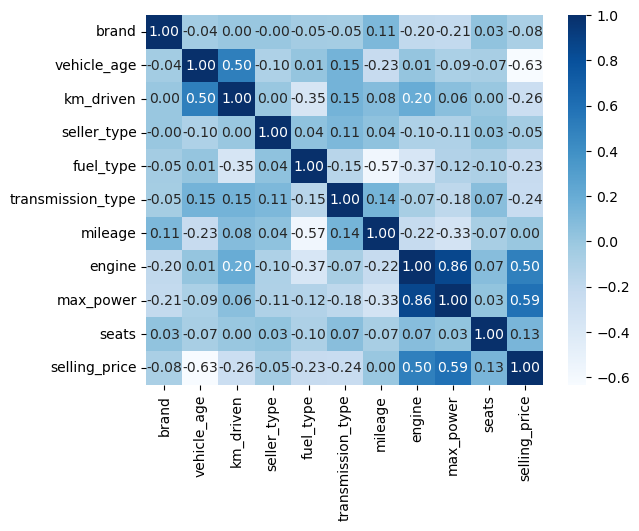

In [99]:
sns.heatmap(corr, cmap = 'Blues', annot = True, fmt = '.2f')
plt.show()

**train_test_split**

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = df_m.drop('selling_price', axis = 1)
y = df_m['selling_price']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8757, 10)
(2920, 10)
(8757,)
(2920,)


**Building linear regression model**

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lin_reg = LinearRegression()

In [90]:
m = lin_reg.fit(X_train, y_train)

In [91]:
y_pred = m.predict(X_test)

**Model Evaluation**

In [92]:
from sklearn import metrics

In [93]:
def Evaluation(X_test, y_test, model):
    y_pred = m.predict(X_test)
    mse = metrics.mean_absolute_error(y_test, y_pred)
    msqe = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred) 
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print("mean_absolute_error        : ", round(mse, 2))
    print("mean_squared_error         : ", round(msqe, 2))
    print("root_mean_absolute_error   : ", round(rmse, 2))
    print("R2_score                   : ", round(r2_score, 2))    

In [94]:
Evaluation(X_test, y_test, m)

mean_absolute_error        :  92181.58
mean_squared_error         :  13869620127.61
root_mean_absolute_error   :  117769.35
R2_score                   :  0.74


In [100]:
print(f'r2_score for model on test data : {round(metrics.r2_score(y_test, y_pred),2)}')
print(f'r2_score for model on train data : {round(metrics.r2_score(y_train, m.predict(X_train)),2)}')

r2_score for model on test data : 0.74
r2_score for model on train data : 0.73
